In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("data.csv")

In [21]:
df.head()

,name,kingdom,Has_known_discoverer,introduction_length,Number_of_sections,Sections_length,conservation_status
0,Aa achalensis,Plantae,Yes,122,4,1016,Scientific classification
1,Aa argyrolepis,Plantae,Yes,178,0,0,No data
2,Aa aurantiaca,Plantae,Yes,114,0,0,No data
3,Aa calceata,Plantae,Yes,119,0,0,No data
4,Aa colombiana,Plantae,Yes,128,0,0,No data


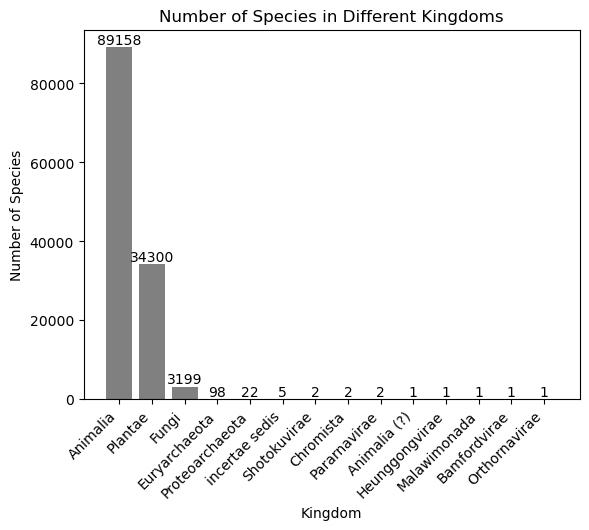

In [22]:
kingdom_counts = df['kingdom'].value_counts()

for index, value in enumerate(kingdom_counts.values):                           ## Shows the exact
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')          ## number for the values

plt.bar(kingdom_counts.index, kingdom_counts.values, color='gray')
plt.xlabel('Kingdom')
plt.ylabel('Number of Species')
plt.title('Number of Species in Different Kingdoms')
plt.xticks(rotation=45, ha='right')
plt.savefig("Graphs/species_by_kingdom.pdf", format='pdf', bbox_inches='tight')

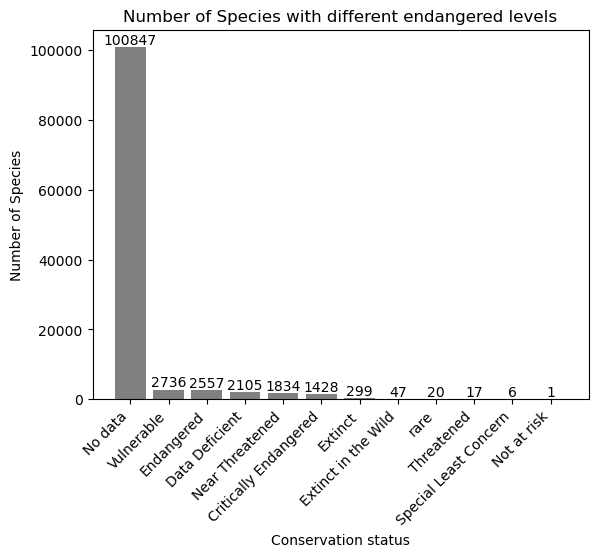

In [23]:
filtered_df = df[df['conservation_status'].isin(["No data", "Least concern", "Nature serve", "Vulnerable", "Endangered","Data Deficient", "Near Threatened", "Critically Endangered", "Extinct", "Extinct in the Wild", "Threatened","Not at risk", "Extinct in the wild", "Special Least Concern", "rare"])]

conservation_counts = filtered_df['conservation_status'].value_counts() #change to DF in order to check results

for index, value in enumerate(conservation_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
plt.bar(conservation_counts.index, conservation_counts.values, color='gray')
plt.xlabel('Conservation status')
plt.ylabel('Number of Species')
plt.title('Number of Species with different endangered levels')
plt.xticks(rotation=45, ha='right')
plt.savefig("Graphs/species_conservation.pdf", format='pdf', bbox_inches='tight')

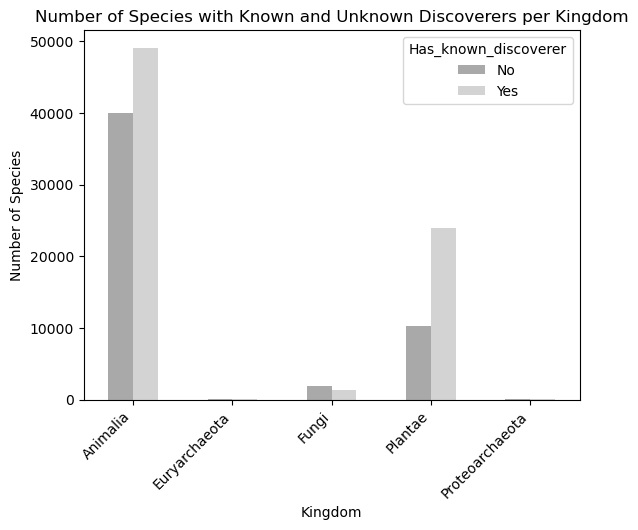

In [24]:
filtered_df = df[df['kingdom'].isin(["Animalia", "Fungi", "Plantae","Euryarchaeota","Proteoarchaeota"])]

grouped_data = filtered_df.groupby(['kingdom', 'Has_known_discoverer']).size().unstack(fill_value=0)

grouped_data.plot(kind='bar', stacked=False, color=['darkgray', 'lightgray'])
plt.xlabel('Kingdom')
plt.ylabel('Number of Species')
plt.title('Number of Species with Known and Unknown Discoverers per Kingdom')
plt.xticks(rotation=45, ha='right')


plt.savefig("Graphs/kingdom_known_discoverer.pdf", format='pdf', bbox_inches='tight')



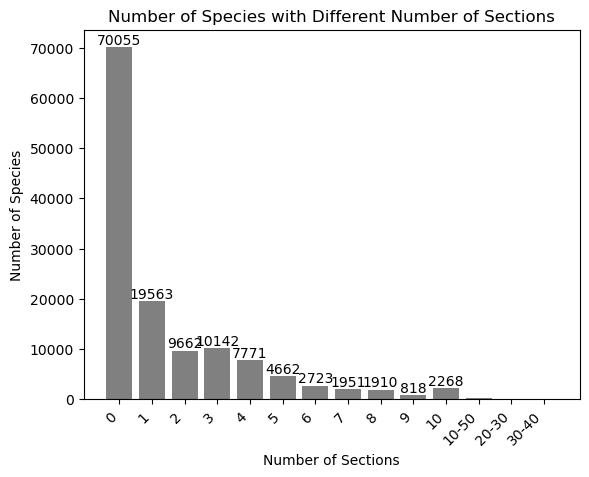

In [25]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '10-50', '20-30', '30-40']

df['Sections_Binned'] = pd.cut(df['Number_of_sections'], bins=bins, labels=labels, right=False)

sections_counts = df['Sections_Binned'].value_counts().sort_index()

plt.bar(sections_counts.index, sections_counts.values, color='gray')
plt.xlabel('Number of Sections')
plt.ylabel('Number of Species')
plt.title('Number of Species with Different Number of Sections')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(sections_counts.values):
    if index < 11: 
        plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.savefig("Graphs/Species_by_sections.pdf", format='pdf', bbox_inches='tight')

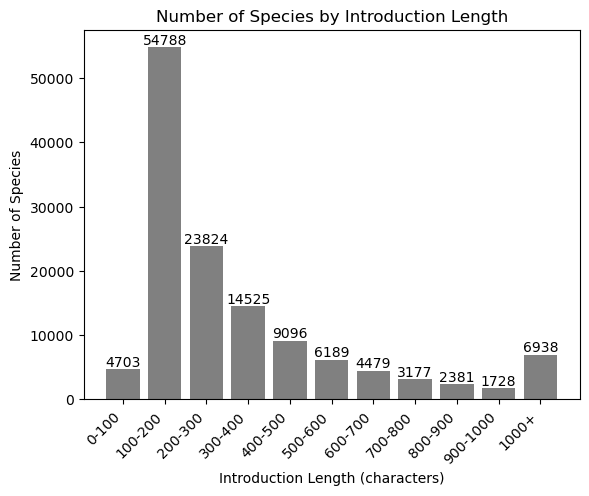

In [26]:
bins = list(range(0, 1100, 100)) + [float('inf')]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', 
          '800-900', '900-1000', '1000+']

df['Introduction_Binned'] = pd.cut(df['introduction_length'], bins=bins, labels=labels, right=False)

introduction_counts = df['Introduction_Binned'].value_counts().sort_index()

plt.bar(introduction_counts.index, introduction_counts.values, color='gray')
plt.xlabel('Introduction Length (characters)')
plt.ylabel('Number of Species')
plt.title('Number of Species by Introduction Length')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(introduction_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.savefig("Graphs/Species_by_introduction_length.pdf", format='pdf', bbox_inches='tight')

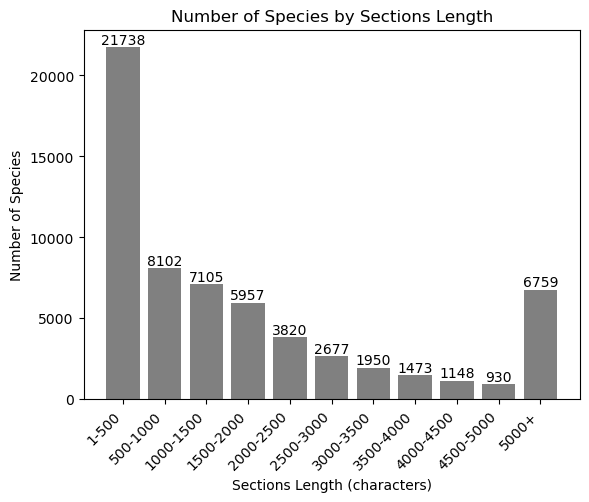

In [27]:
bins = list(range(1, 5500, 500)) + [float('inf')]
labels = ['1-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', 
          '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000+']

df['Sections_Length_Binned'] = pd.cut(df['Sections_length'], bins=bins, labels=labels, right=False)

sections_length_counts = df['Sections_Length_Binned'].value_counts().sort_index()

plt.bar(sections_length_counts.index, sections_length_counts.values, color='gray')
plt.xlabel('Sections Length (characters)')
plt.ylabel('Number of Species')
plt.title('Number of Species by Sections Length')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(sections_length_counts.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.savefig("Graphs/Species_by_sections_length.pdf", format='pdf', bbox_inches='tight')